# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $6 \% 7 $

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
# Загрузим данные
df = pd.read_csv('../../datasets/teen_phone_addiction_dataset.csv')

# Выберем нужный столбец (Daily_Usage_Hours)
data = df.iloc[:, 6]

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения


In [8]:
mean = np.mean(data)
variance = np.var(data, ddof=1)
mode = data.mode()[0]
median = np.median(data)
quantiles = np.percentile(data, [25, 50, 75])
kurtosis = stats.kurtosis(data)
skewness = stats.skew(data)
iqr = stats.iqr(data)

print("Среднее:", mean)
print("Дисперсия:", variance)
print("Мода:", mode)
print("Медиана:", median)
print("Квантили (25%, 50%, 75%):", quantiles)
print("Эксцесс:", kurtosis)
print("Ассиметрия:", skewness)
print("Интерквартильный размах:", iqr)

Среднее: 5.020666666666667
Дисперсия: 3.827895520729132
Мода: 4.4
Медиана: 5.0
Квантили (25%, 50%, 75%): [3.7 5.  6.4]
Эксцесс: -0.1226141759584718
Ассиметрия: 0.016197292999157842
Интерквартильный размах: 2.7


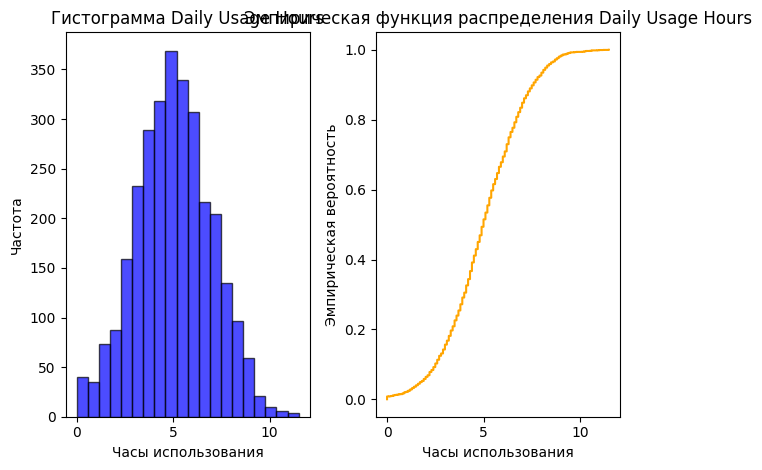

In [9]:
# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма Daily Usage Hours')
plt.xlabel('Часы использования')
plt.ylabel('Частота')

# Эмпирическая функция распределения
plt.subplot(1, 2, 2)
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, ecdf, where='post', color='orange')
plt.title('Эмпирическая функция распределения Daily Usage Hours')
plt.xlabel('Часы использования')
plt.ylabel('Эмпирическая вероятность')

plt.tight_layout()
plt.show()

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

Статистика Хи-квадрат: 1893.7933333333333
Ассиметрия: 0.016197292999157842
Эксцесс: -0.1226141759584718


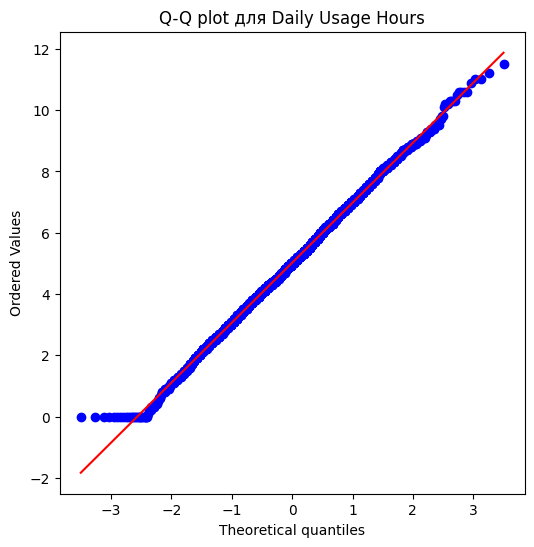

In [10]:
# 1. Критерий Хи-квадрат
def chi_square_test(data, num_bins=10):
    observed_freq, bins = np.histogram(data, bins=num_bins)
    expected_freq = np.full_like(observed_freq, len(data) / num_bins)
    chi_square_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    return chi_square_stat

chi_square_stat = chi_square_test(data)
print("Статистика Хи-квадрат:", chi_square_stat)

# 2. Проверка ассиметрии и эксцесса
print("Ассиметрия:", skewness)
print("Эксцесс:", kurtosis)

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot для Daily Usage Hours')
plt.show()

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

Статистика Хи-квадрат (обработанные данные): 828.6294642857142


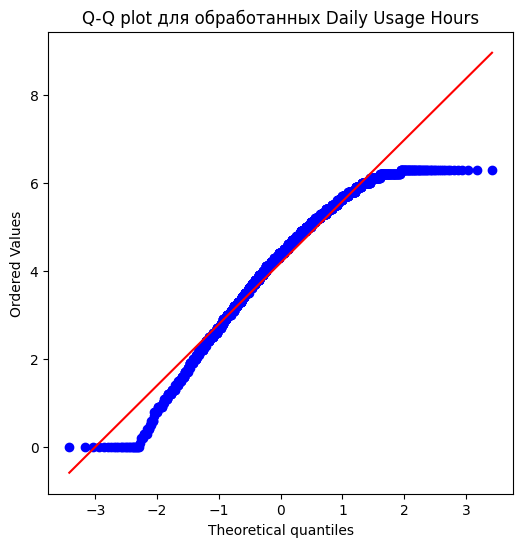

In [11]:
# Удаление выбросов (например, выбросы выше 95% квантиля)
filtered_data = data[data < quantiles[2]]

# Стандартизация
standardized_data = (filtered_data - np.mean(filtered_data)) / np.std(filtered_data)

# Проверка на нормальность для обработанных данных
chi_square_stat_filtered = chi_square_test(filtered_data)
print("Статистика Хи-квадрат (обработанные данные):", chi_square_stat_filtered)

# Q-Q plot для обработанных данных
plt.figure(figsize=(6, 6))
stats.probplot(filtered_data, dist="norm", plot=plt)
plt.title('Q-Q plot для обработанных Daily Usage Hours')
plt.show()

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

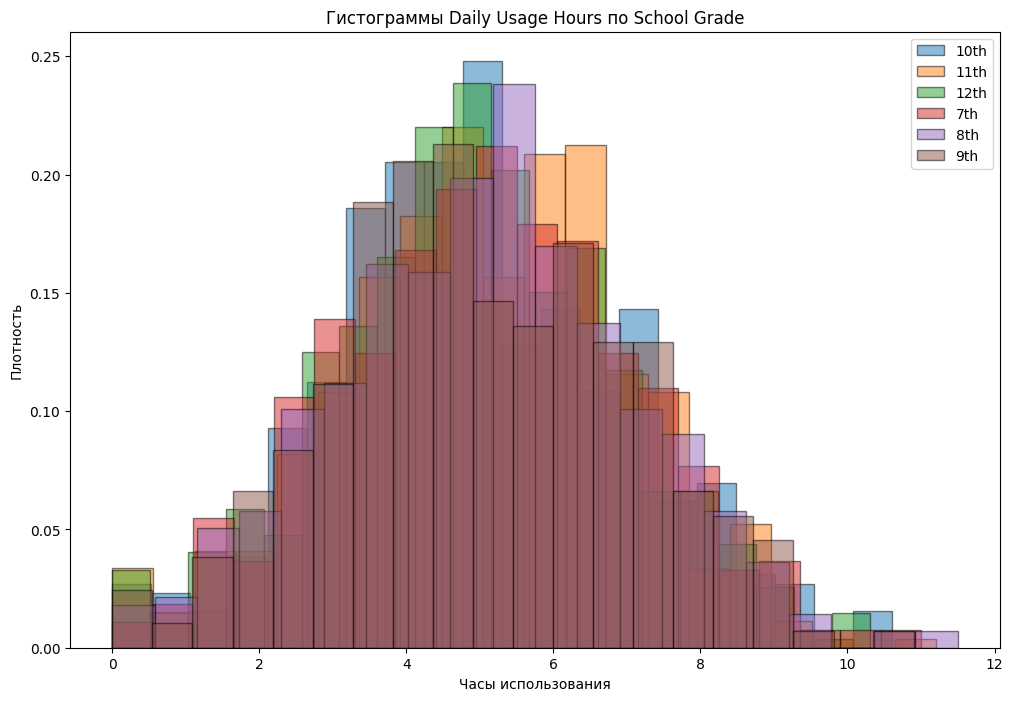

In [12]:
grouped = df.groupby('School_Grade')['Daily_Usage_Hours']

# Гистограммы для каждой группы
plt.figure(figsize=(12, 8))
for name, group in grouped:
    plt.hist(group, bins=20, alpha=0.5, label=name, edgecolor='black', density=True)

plt.title('Гистограммы Daily Usage Hours по School Grade')
plt.xlabel('Часы использования')
plt.ylabel('Плотность')
plt.legend()
plt.show()

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'

In [13]:
group_stats = grouped.agg(['mean', 'var'])
print("Среднее и дисперсия по группам:\n", group_stats)

Среднее и дисперсия по группам:
                   mean       var
School_Grade                    
10th          4.977618  3.812605
11th          5.061795  3.635211
12th          4.936862  3.735589
7th           5.077062  3.883344
8th           5.066390  4.009513
9th           5.012167  3.912652


## Промежуточные выводы
1. Числовые характеристики: Среднее, мода, медиана и другие статистики предоставляют информацию о распределении данных.

2. Нормальность данных: Критерии ассиметрии и эксцесса помогают определить, насколько данные отклоняются от нормального распределения.

3. Эффект от обработки данных: Сравнение статистик до и после обработки даст представление о том, удалось ли привести данные к нормальному виду.

4. Различия распределений внутри групп: Группировка по 'School_Grade' позволяет сравнить использование телефонов среди разных классов.

In [14]:
N = 0
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Daily_Usage_Hours'